In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [24]:
%autoreload 2
from src import ODE_euler


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Implementación del método de Euler para resolver ODEs"""
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

# Definición de la ecuación diferencial y solución exacta
def f(t, y):
    return -5*y + 5*t**2 + 2*t

def exact_solution(t):
    return t**2 + (1/3)*np.exp(-5*t)

# Parámetros del problema
a = 0
b = 1
y_t0 = 1/3

# Valores de N a probar
N_values = [5, 10, 20]
results = {}

# Resolver para cada N
for N in N_values:
    ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    exact_ys = [exact_solution(t) for t in ts]
    relative_errors = [abs((exact - approx)/exact) for exact, approx in zip(exact_ys, ys)]
    average_error = np.mean(relative_errors)
    
    results[N] = {
        'h': h,
        'average_error': average_error,
        'ys': ys,
        'ts': ts,
        'exact_ys': exact_ys
    }



# Errores
Calcule el eeror relativo para diferentes valores de N.

Para N=5:
  h = 0.2
  Error relativo promedio = 2.80e-01

Para N=10:
  h = 0.1
  Error relativo promedio = 1.29e-01

Para N=20:
  h = 0.05
  Error relativo promedio = 6.31e-02



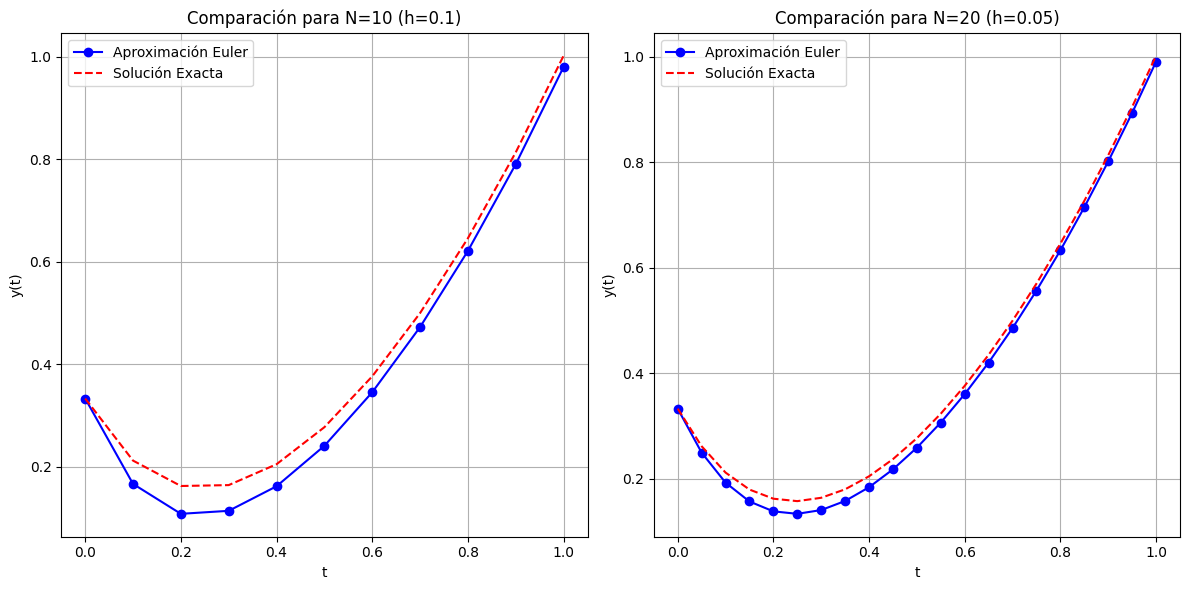


Resultados en formato requerido:
e_N=5 = 2.80e-01
e_N=10 = 1.29e-01
e_N=20 = 6.31e-02


In [5]:
# Calcular error relativo
for N, data in results.items():
    print(f"Para N={N}:")
    print(f"  h = {data['h']}")
    print(f"  Error relativo promedio = {data['average_error']:.2e}")
    print()

# Graficar resultados para N=10 y N=20
plt.figure(figsize=(12, 6))

# Gráfico para N=10
plt.subplot(1, 2, 1)
plt.plot(results[10]['ts'], results[10]['ys'], 'b-o', label='Aproximación Euler')
plt.plot(results[10]['ts'], results[10]['exact_ys'], 'r--', label='Solución Exacta')
plt.title(f'Comparación para N=10 (h={results[10]["h"]})')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

# Gráfico para N=20
plt.subplot(1, 2, 2)
plt.plot(results[20]['ts'], results[20]['ys'], 'b-o', label='Aproximación Euler')
plt.plot(results[20]['ts'], results[20]['exact_ys'], 'r--', label='Solución Exacta')
plt.title(f'Comparación para N=20 (h={results[20]["h"]})')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados en formato solicitado
print("\nResultados en formato requerido:")
print(f"e_N=5 = {results[5]['average_error']:.2e}")
print(f"e_N=10 = {results[10]['average_error']:.2e}")
print(f"e_N=20 = {results[20]['average_error']:.2e}")